In [17]:
c = 0.4  # compositional integrity
f = 1  # functional integrity
s = 1  # structural integrity

In [ ]:
def fuzzy_sum(c, f, s):
    return (c + f + s) - (c * f + f * s + s * c) + (c * f * s)


import numpy as np


def fuzzy_sum_min(c, f, s):
    v = [c, f, s]
    v = np.sort(v)
    M = v[0]
    y = v[1]
    z = v[2]
    F = y + z - y * z
    EII = M + (1 - M) * F
    return EII


def fuzzy_sum_min_2(c, f, s):
    v = [c, f, s]
    v = np.sort(v)
    M = v[0]
    y = v[1]
    z = v[2]
    F = y + z - y * z
    EII = M * F
    return EII


{
    "min_approach": fuzzy_sum_min(c, f, s),
    "alternative": fuzzy_sum(c, f, s),
    "alternative_2": fuzzy_sum_min_2(c, f, s),
    "product": c * f * s,
    "mean": (c + f + s) / 3,
}

{'min_approach': 1.0,
 'alternative': 1.0,
 'alternative_2': 0.4,
 'product': 0.4,
 'mean': 0.7999999999999999}

/home/bleutner/Code/geomodels/.venv/lib/python3.12/site-packages/plotnine/guides/guides.py:211: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


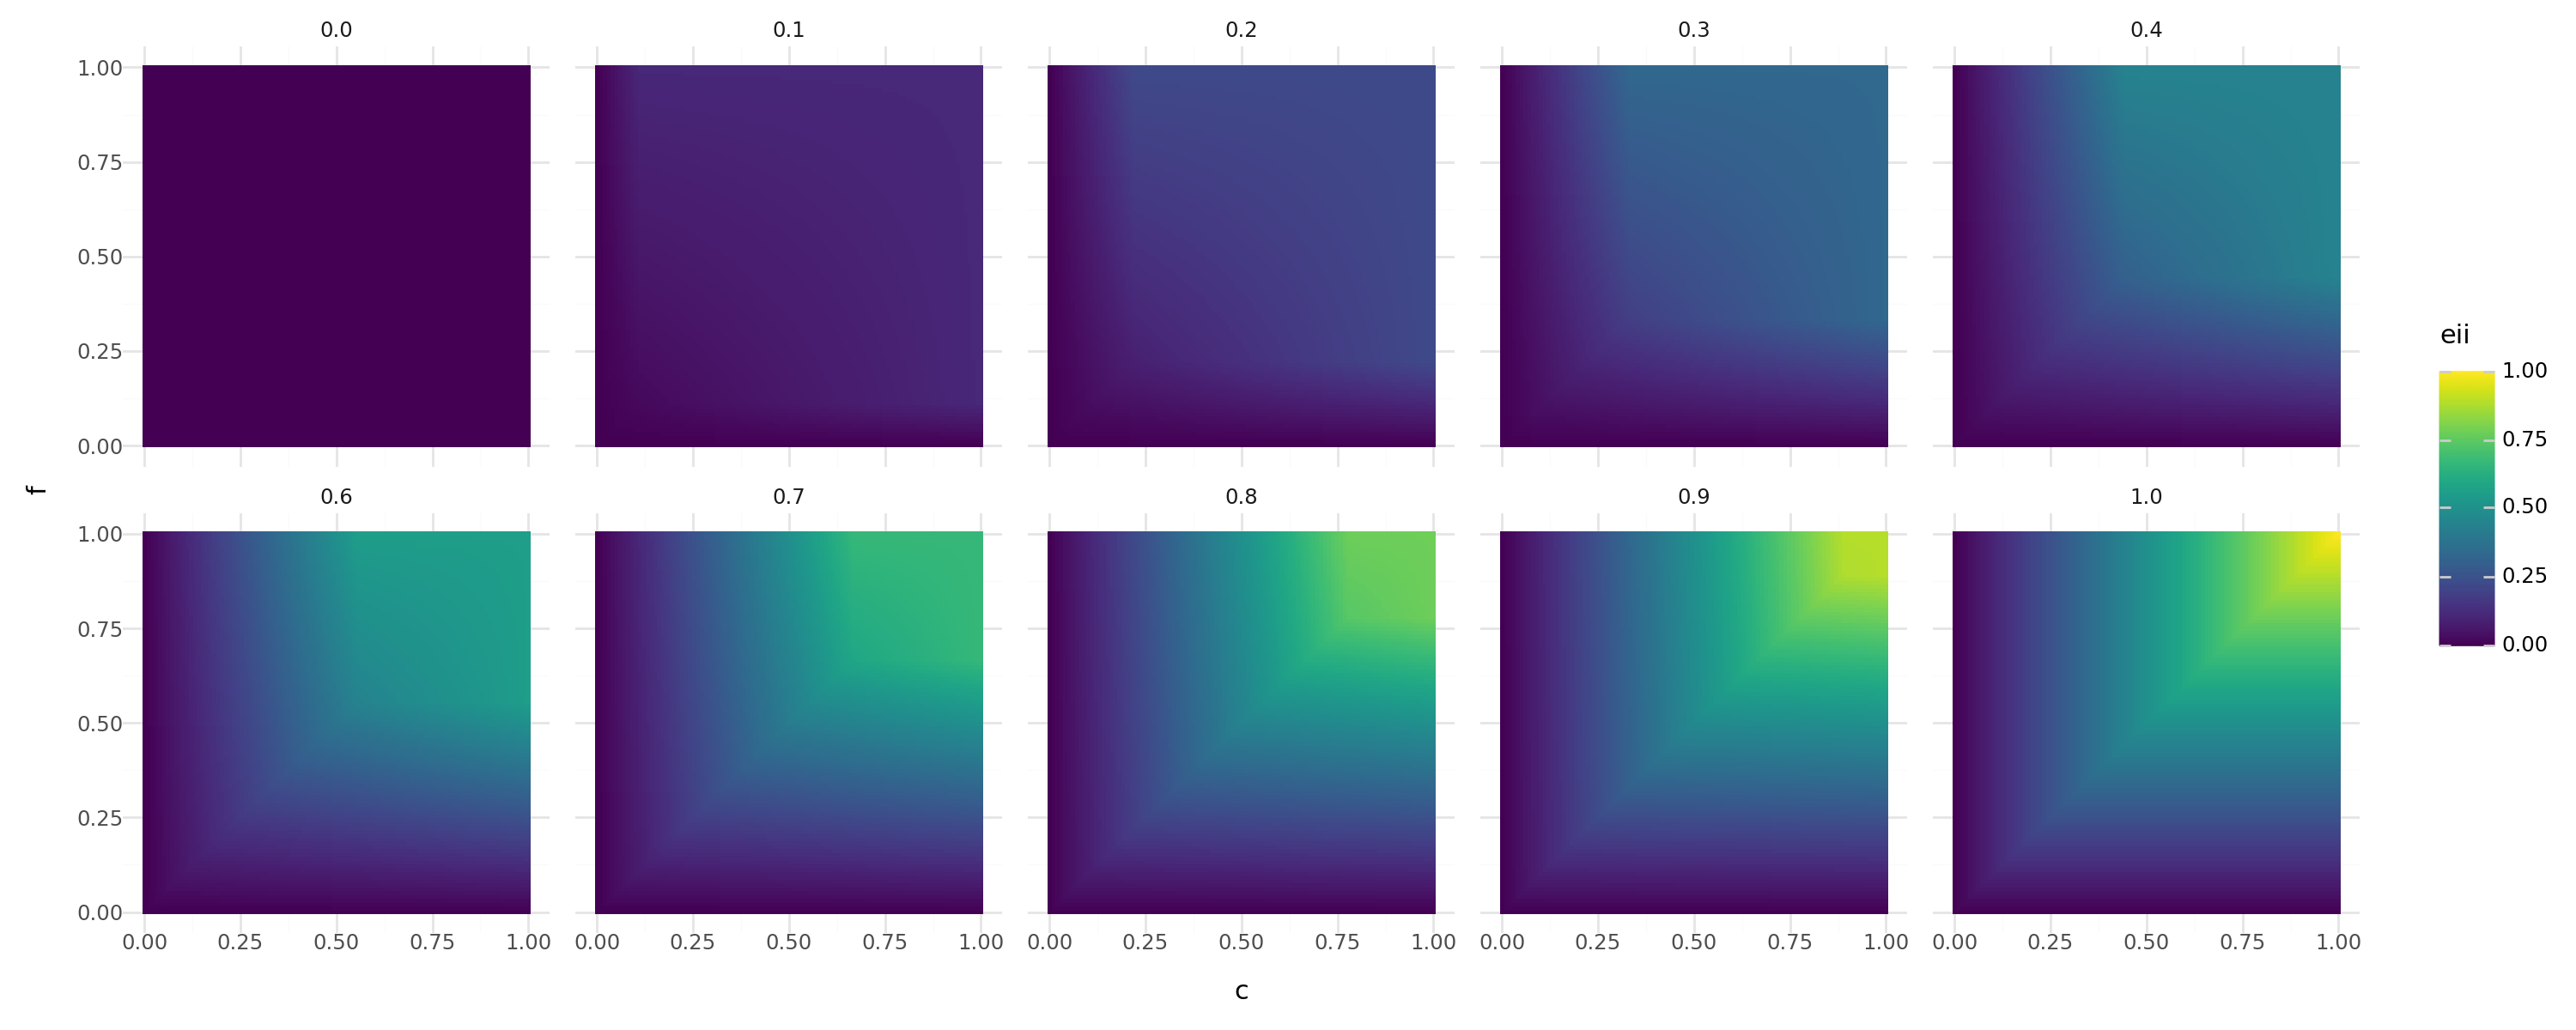

In [36]:
n = 100
C = np.linspace(0, 1, n)
F = np.linspace(0, 1, n)
S = np.linspace(0, 1, int(n / 10.0))


scores = []

for c in C:
    for f in F:
        for s in S:
            eii = fuzzy_sum_min_2(c, f, s)
            scores.append({"s": round(s, 1), "f": f, "c": c, "eii": eii})

import pandas as pd

df = pd.DataFrame(scores)

from plotnine import *

(
    ggplot(df, aes(x="c", y="f", z="s", fill="eii"))
    + geom_raster()
    + theme_minimal()
    + scale_color_gradient(low="blue", high="red")
    + facet_wrap("~s", ncol=5)
    + theme(figure_size=(15, 6))
)